In [1]:
import pandas as pd
import datetime
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [3]:
targetdir = "./data/TraderStrength/one_day_window/"
filename = "strengthCDF_one_day_window.csv"

df = pd.read_csv(targetdir + filename)

In [4]:
df

,timestamp,strength,activity,strength_cumulative_probability,total_transactions,activity_cumulative_probability,total_activity_days
0,1557183600000,68,2,0.001692,1910,0.055838,624
1,1557183600000,47,2,0.005076,1910,0.055838,624
2,1557183600000,41,2,0.006768,1910,0.055838,624
3,1557183600000,27,2,0.011844,1910,0.055838,624
4,1557183600000,26,2,0.018613,1910,0.055838,624
...,...,...,...,...,...,...,...
2467418,1612738800000,1,1,1.000000,16428,1.000000,3630
2467419,1612738800000,1,1,1.000000,16428,1.000000,3630
2467420,1612738800000,1,1,1.000000,16428,1.000000,3630
2467421,1612738800000,1,1,1.000000,16428,1.000000,3630


In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms').dt.normalize()

In [6]:
df = df[["timestamp", "strength"]]
df

,timestamp,strength
0,2019-05-06,68
1,2019-05-06,47
2,2019-05-06,41
3,2019-05-06,27
4,2019-05-06,26
...,...,...
2467418,2021-02-07,1
2467419,2021-02-07,1
2467420,2021-02-07,1
2467421,2021-02-07,1


# Mean strength per day

In [7]:
df_mean = df.groupby(["timestamp"]).mean()
df_mean = df_mean.reset_index()
df_mean

,timestamp,strength
0,2017-11-23,9.568627
1,2017-11-24,3.789474
2,2017-11-25,3.104000
3,2017-11-26,2.508772
4,2017-11-27,2.275862
...,...,...
1247,2021-04-23,5.893418
1248,2021-04-24,5.702844
1249,2021-04-25,5.846234
1250,2021-04-26,5.690995


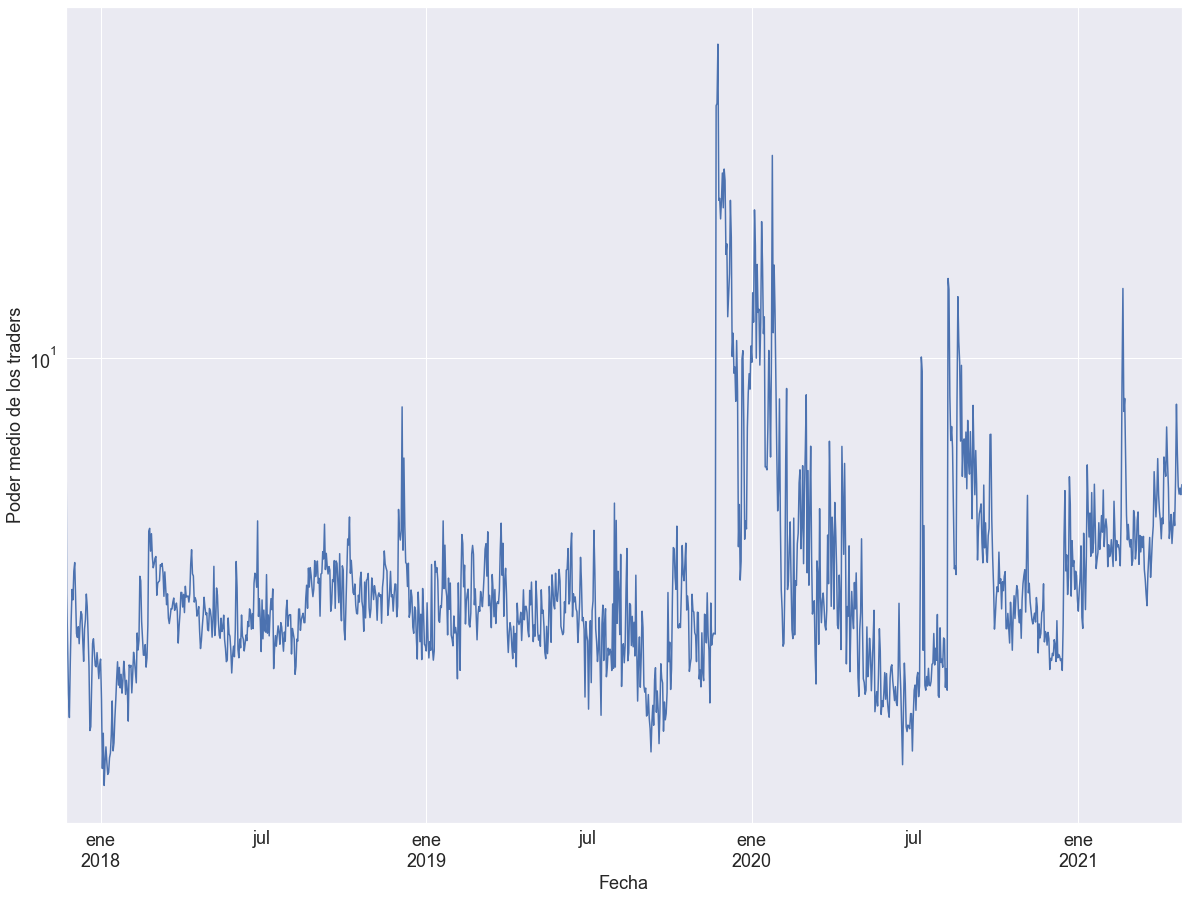

In [9]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

ax = df_mean.plot(kind = 'line', x = 'timestamp', y = 'strength')
ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Poder medio de los traders", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

plt.savefig("./strengthCDF/one_day_window/one_day_window_mean_strengthCDF.svg", bbox_inches='tight')

# Median strength per day

In [10]:
df_median = df.groupby(["timestamp"]).median()
df_median = df_median.reset_index()
df_median

,timestamp,strength
0,2017-11-23,3.0
1,2017-11-24,2.0
2,2017-11-25,1.0
3,2017-11-26,1.0
4,2017-11-27,1.0
...,...,...
1247,2021-04-23,2.0
1248,2021-04-24,1.0
1249,2021-04-25,2.0
1250,2021-04-26,2.0


In [11]:
df_median["strength"].unique()

array([3. , 2. , 1. , 1.5])

In [19]:
df_median[df_median["strength"] == 3]

,timestamp,strength
0,2017-11-23,3.0
729,2019-11-22,3.0


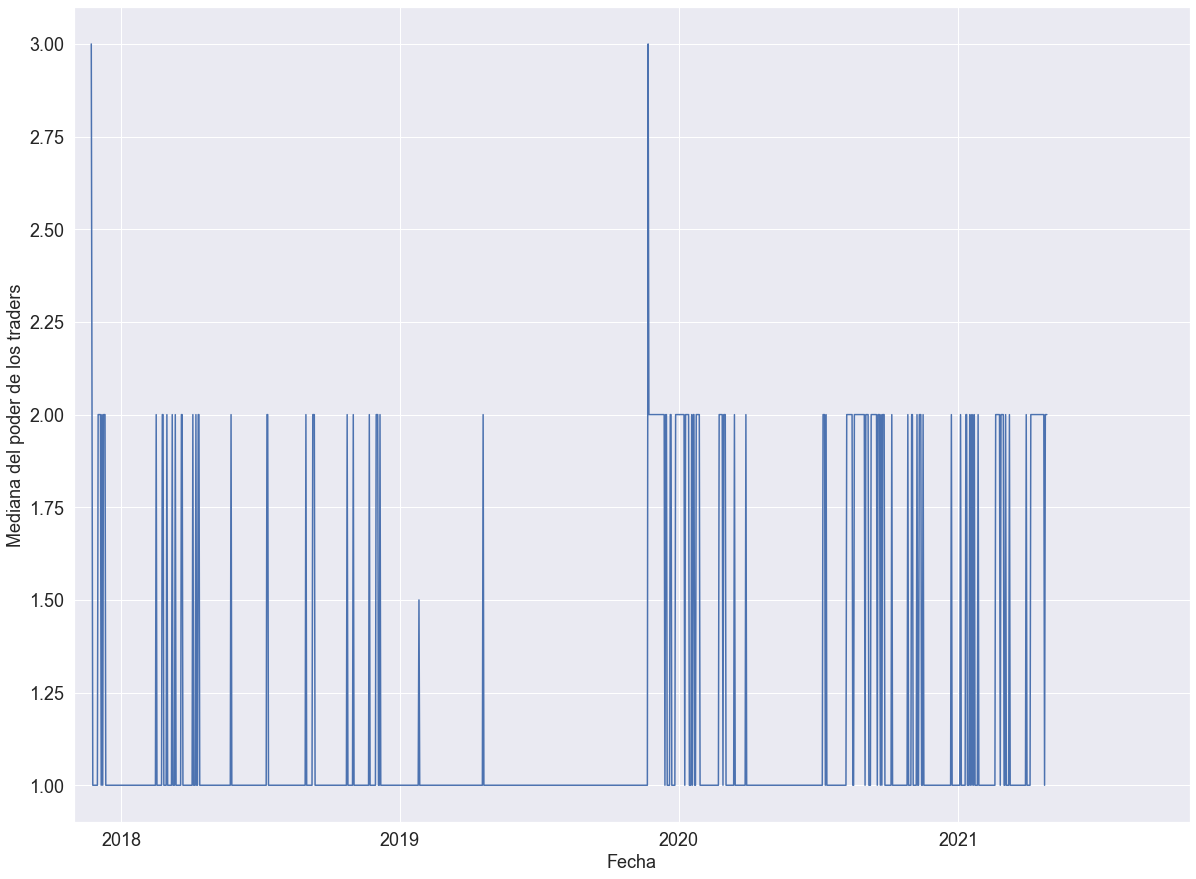

In [21]:
ax = df_median.plot(kind = 'line', x = 'timestamp', y = 'strength')

ax.set_xlim("2017-10-31", "2021-10-31")
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Mediana del poder de los traders", fontsize=18)
ax.get_legend().remove()
#plt.legend(["Todos los activos"])

plt.savefig("./strengthCDF/one_day_window/one_day_window_median_strengthCDF.svg", bbox_inches='tight')

# Max strength per day

In [13]:
df_max = df.groupby(["timestamp"]).max()
df_max = df_max.reset_index()
df_max

,timestamp,strength
0,2017-11-23,434
1,2017-11-24,90
2,2017-11-25,48
3,2017-11-26,35
4,2017-11-27,42
...,...,...
1247,2021-04-23,2579
1248,2021-04-24,3067
1249,2021-04-25,4561
1250,2021-04-26,5020


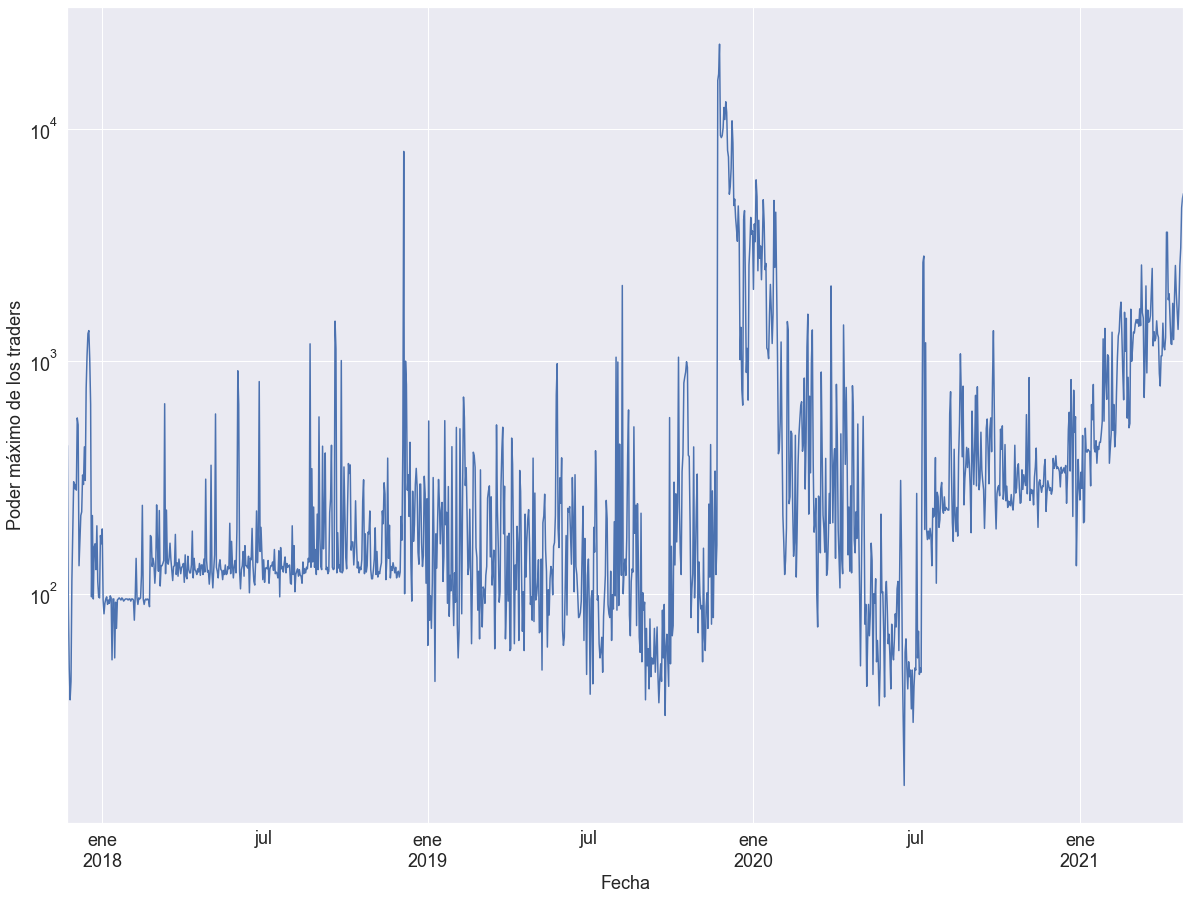

In [14]:
ax = df_max.plot(kind = 'line', x = 'timestamp', y = 'strength')

ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Poder máximo de los traders", fontsize=18)
ax.get_legend().remove()

plt.savefig("./strengthCDF/one_day_window/one_day_window_max_strengthCDF.svg", bbox_inches='tight')

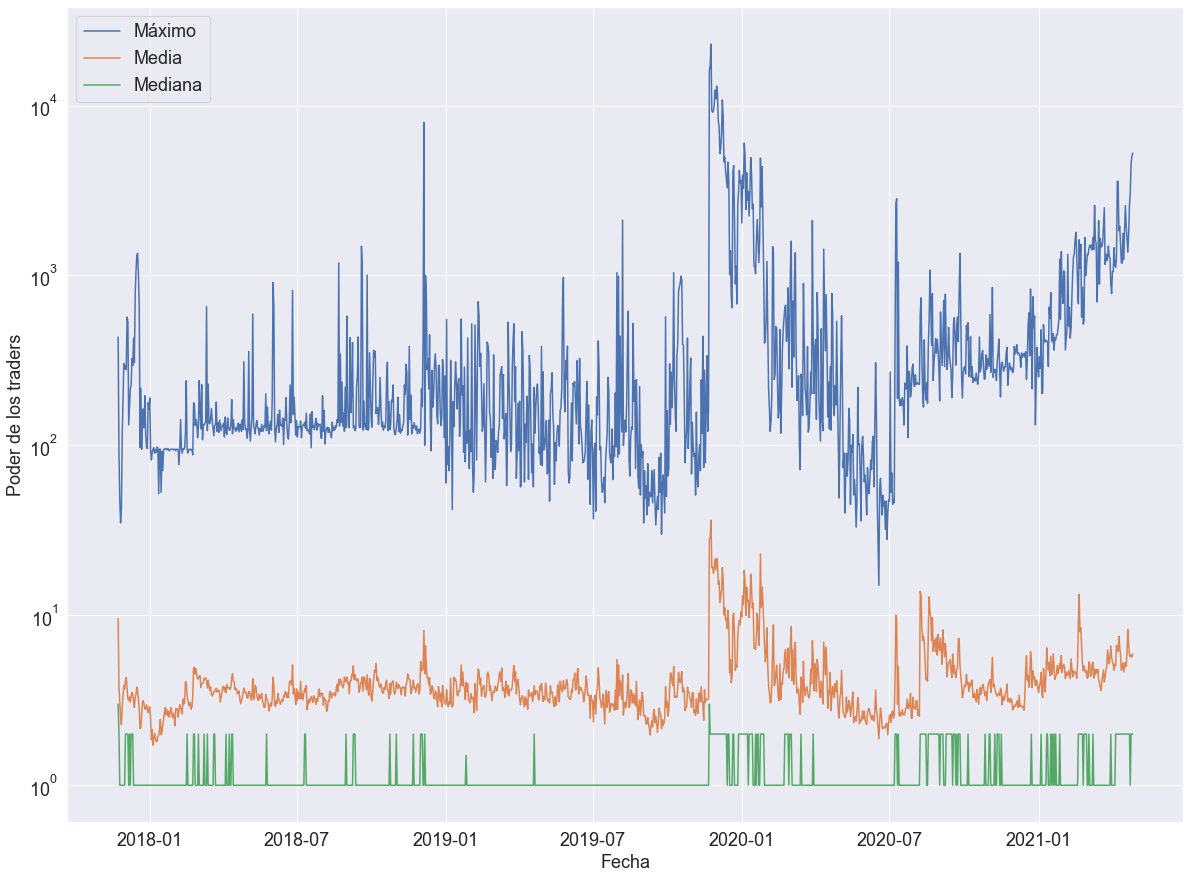

In [15]:
for frame in [df_max, df_mean, df_median]:
    plt.plot(frame['timestamp'], frame['strength'])
    
plt.yscale('log')
plt.ylabel("Poder de los traders", fontsize=18)
plt.xlabel("Fecha", fontsize=18)
plt.legend(["Máximo", "Media", "Mediana"], prop={'size': 18}, loc="upper left")
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)
plt.figsize=(20, 15)

plt.savefig("./strengthCDF/one_day_window/mean_median_max_strengthCDF.svg", bbox_inches='tight')